Persecución Puro (PP), ejercicio de clase tema 15 curso 2016

Apartado A

Un misil, guiado mediante la ley de persecución pura, se lanza, con 550m/s de velocidad constante y a 1000 m de distancia de un avión, el cual se aleja de este punto de lanzamiento, con movimiento rectilíneo y uniforme de velocidad 300m/s.
Si el ángulo de confrontación inicial δTo es de 20o, determínese, para conseguir el impacto en dicho avión, los segundos transcurridos desde el lanzamiento hasta el instante en el cual se requiere la aceleración máxima de maniobra y el valor de dicha aceleración.

In [50]:
#primero importamos
import numpy as np
#importar numpy para calculo numérico
from sympy import *
#importar sympy para calculo simbolico
init_printing(use_latex=True)
from scipy import optimize
import math
import matplotlib.pyplot as plt

In [51]:
#velocidad misil, m/s
Vm=550
#velocidad del objetivo (target) m/s
Vt=300
#ángulo de confrontación inicial, grados
δt0=20
t0=0
r0=1000

In [52]:
#Apartado A


#K relación de velocidades (adim)
K=Vm/Vt 
print('K=',K) #Condición necesaria K>1

K= 1.8333333333333333


In [53]:
# 1<K<2 la aceleración (Γ) es máxima en δt1
# Si δt0 ≤δt1 la aceleración es máxima en δTo
# δt1 angulo de aceleración máxima
δt1=acos(K/2)
deg(δt1).evalf()

In [54]:
#δt0<δt1
δt0=rad(δt0) #trabajaremos con radianes
#aceleración máxima es la misma que la inicial
Γm0=Vt*Vm*sin(δt0)/r0
Γm0.evalf()

Apartado B

Calcúlese el tiempo de vuelo del misil y la distancia relativa entre ambos móviles para los valores de δT 20o,16o, 10o, 6o, 2o y 0o, así como los valores de la aceleración requerida en cada instante.

Apartado C

Represéntese las trayectorias de los dos móviles con los puntos anteriores, tomando como sistema de coordenadas, el formado por OXY, siendo O el punto en donde se encuentra el avión en el instante inicial del combate, eje OX según la trayectoria del mismo en sentido de avance, y OY eje perpendicular al anterior a derechas.


δt= 20 º
r= 1000.00000000000 m t= 0 s Γm= 56.4333236487353 m/s**2
xm= -939.692620785908 m ym= -342.020143325669 m
xt= 0 m yt= 0 m

δt= 16 º
r= 818.654207764477 m t= 0.685015022694089 s Γm= 55.5547913617874 m/s**2
xm= -581.436425334495 m ym= -225.651681156661 m
xt= 205.504506808227 m yt= 0 m

δt= 10 º
r= 544.973404554497 m t= 1.74665507545214 s Γm= 52.5749496683527 m/s**2
xm= -12.6975113550841 m ym= -94.6336385778313 m
xt= 523.996522635643 m yt= 0 m

δt= 6 º
r= 353.827508206901 m t= 2.50228656702762 s Γm= 48.7446454532798 m/s**2
xm= 398.796766012926 m ym= -36.9850456946904 m
xt= 750.685970108286 m yt= 0 m

δt= 2 º
r= 141.200900463347 m t= 3.35017800270099 s Γm= 40.7817296987241 m/s**2
xm= 863.938516120391 m ym= -4.92784036011075 m
xt= 1005.05340081030 m yt= 0 m

δt= 0 º
r= 0 m t= 3.91486017052128 s Γm= nan m/s**2
xm= 1174.45805115638 m ym= 0 m
xt= 1174.45805115638 m yt= 0 m


Text(0,0.5,'y')

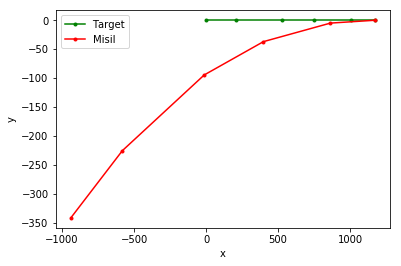

In [72]:
#creo listas vacías para ir guardando resultados para plot
xtplot=[]
ytplot=[]
xmplot=[]
ymplot=[]
#Si 0<|δT0|<π/2 (bucle para meter de delta en delta)
for δt in (20,16,10,6,2,0):
    δt=rad(δt)
    r=r0*(((1+cos(δt0))**K)*((sin(δt))**(K-1))/((sin(δt0)**(K-1))*((1+cos(δt))**K)))
    t=(r0*(cos(δt0)+K)-r*(cos(δt)+K))/(K*Vm-Vt)
    Γm=Vt*Vm*sin(δt)/r
    print()
    print('δt=',deg(δt),'º')
    print('r=',r.evalf(),'m','t=',t.evalf(),'s','Γm=',Γm.evalf(),'m/s**2')
    #para sacar posiciones target y misil
    yt=0
    xt=Vt*t
    ym=-r*sin(δt)
    xm=(xt-r*cos(δt))
    print('xm=',xm.evalf(),'m','ym=',ym.evalf(),'m')
    print('xt=',xt.evalf(),'m','yt=',yt,'m')

    #guardo en listas,para luego hacer plot
    xtplot.append(xt)
    ytplot.append(yt)
    xmplot.append(xm)
    ymplot.append(ym)
    
#representación
plt.plot(xtplot,ytplot,label="Target",color='green',marker='.')
plt.plot(xmplot,ymplot,label="Misil",color='red',marker='.')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

Apartado D

Si el misil tuviera limitada su capacidad de maniobra a 4g de aceleración (g = 9,81 m/s**2), determínese la distancia mínima desde la cual es posible efectuar el lanzamiento con δTo = 20o, para garantizar el impacto.

In [76]:
g=9.81
Γmax=4*g
δt0=rad(20)
r0=Vt*Vm*sin(δt0)/Γmax
print('distancia max=',r0.evalf(),'m')

distancia max= 1438.15809502384 m


Apartado E

Dibújese el límite interior del dominio de tiro de este misil, para los ángulos de confrontación δTo = 0o, 10o, 20o, 40o, 60o y 90o, especificando la distancia mínima de lanzamiento y las aceleraciones de maniobra inicial y máxima requeridas en cada caso.

In [78]:
δt1
print('δt1=',deg(δt1).evalf(),'º')

δt1= 23.5564643091012 º


[0, -719.079047511918, -1351.42654941742, -2222.51499930005, -2508.70172396120, 0]
[0, -126.793037338495, -491.879037785023, -1864.91151619865, -4345.19884693642, -11895.1741805933]


Text(0,0.5,'y')

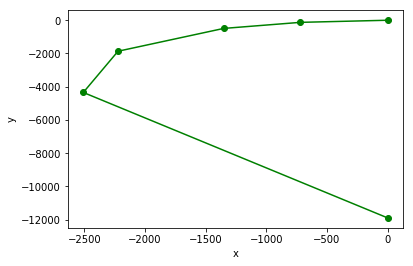

In [98]:
rxplot=[]
ryplot=[]
r0plot=[]
r1plot=[]

for δt0 in [rad(0),rad(10),rad(20),rad(40),rad(60),rad(90)]:
    if δt0 <= δt1: #si la aceleración máxima está en el inicio
        r0=Vt*Vm*sin(δt0)/Γmax
    else: #si la aceleracion máxima está tras el inicio
        r1=Vt*Vm*sin(δt1)/Γmax
        r0=(((tan(δt0/2))/(tan(δt1/2)))**K)*(sin(δt1)/sin(δt0))*r1
        Γm=Vt*Vm*sin(δt)/r0
    rx=-r0*cos(δt0)
    ry=-r0*sin(δt0)
    rxplot.append(rx.evalf())
    ryplot.append(ry.evalf())
    

print(rxplot)
print(ryplot)

plt.plot(rxplot,ryplot,color='green',marker='o')
plt.xlabel("x")
plt.ylabel("y")